Decision trees split a particular scenario into all possible cases and instruct on what to do ineach case. For example, shall I go for a walk? If it's sunny, then yes, otherwise not. So the decision tree specifies criteria that need to be met in order to proceed with an action and can make decision based on the given data (e.g. whether it's sunny). It is a type of machine learning that learn from given data and the decision made in those conditions, to find a correlation. Training data is provided to teach the system and to allow it to recognise patterns and relationships between certain criteria and the outcome. 

However, most real-life scenarios do not follow strict rules that certainly predict the outcome. There may be many decision trees taking into account various factors that may descibe how the outcome is decided. This is called random forest. It bases its outcome on the outcomes of individual decision trees. It is used for regression and classification and "bagging". Training data is provided to teach the system and to allow it to recognise patterns and relationships between certain criteria and the outcome. For example, in case of regression, we could carry out out Bootstrap, which involves simply training the decision trees in the random forest by random data from the dataset. Then they make predictions about new data. Taking the average of the outcomes is a reasonable conclusion to reduce bias, and this process is called aggreggation (as it "weighs out", gives a "summary" of the overall prediction).

Here is an example:

This is the dataset: 
     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]
The mean square error of the predictions is 0.0022188709680832355
The R squared of the predictions is 0.9945134975590542


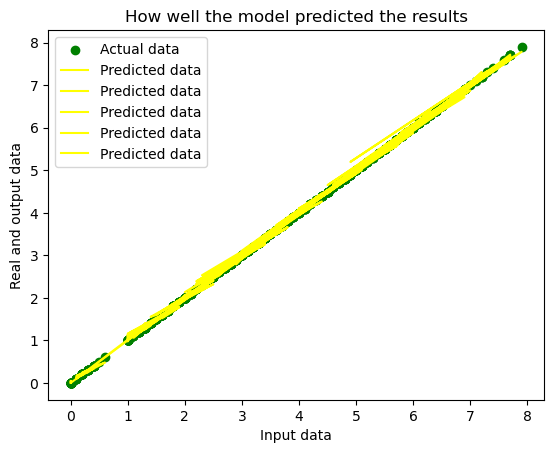

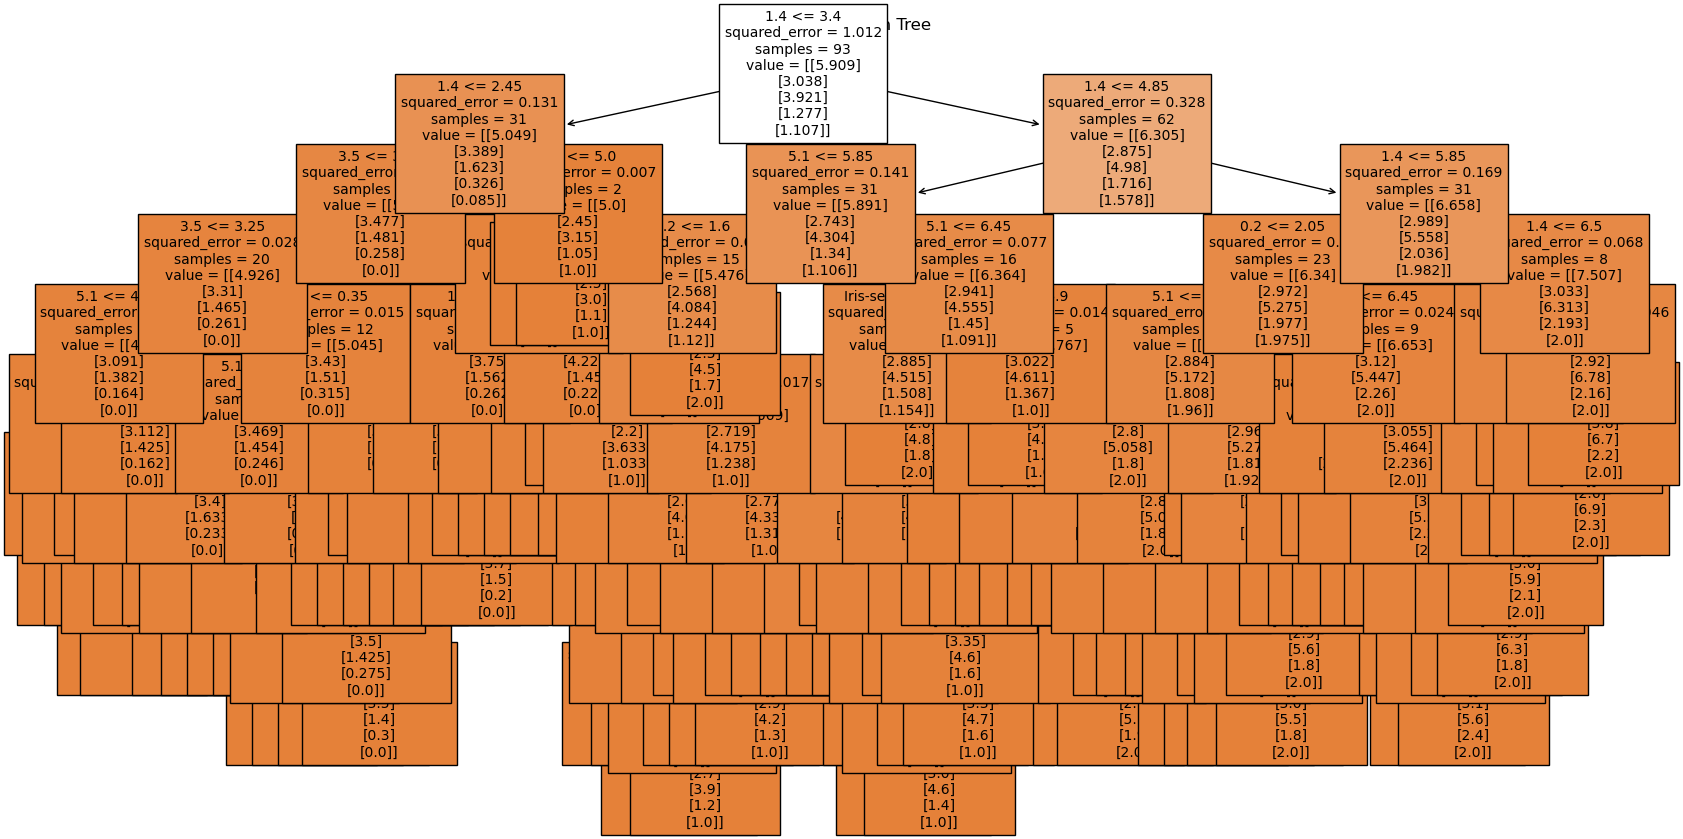

In [41]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#store and display the dataset

data= pd.read_csv('iris.data')
print("This is the dataset: ")
print(data)

#store the training and testing samples from the dataset in the corresponding variables

x_data = data.iloc[:,0].values  
y_data = data.iloc[:,1].values
x_test = data.iloc[:, 2].values
y_test = data.iloc[:, 3].values

#process data

label_encoder = LabelEncoder()
x_categorical = data.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = data.select_dtypes(exclude=['object']).values
x_data = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

label_encoder = LabelEncoder()
y_categorical = data.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
y_numerical = data.select_dtypes(exclude=['object']).values
y_data = pd.concat([pd.DataFrame(y_numerical), y_categorical], axis=1).values

label_encoder = LabelEncoder()
x_categorical = data.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = data.select_dtypes(exclude=['object']).values
x_test = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

label_encoder = LabelEncoder()
y_categorical = data.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
y_numerical = data.select_dtypes(exclude=['object']).values
y_test = pd.concat([pd.DataFrame(y_numerical), y_categorical], axis=1).values

#build the regression models

regression = RandomForestRegressor(n_estimators=149, random_state=0)

regression.fit(x_data, y_data)

y_pred = regression.predict(x_test)

#some statistical quantities

mse = mean_squared_error(y_test, y_pred)
print("The mean square error of the predictions is " + str(mse))
 
r_squared = r2_score(y_test, y_pred)
print("The R squared of the predictions is " + str(r_squared))

#Scatter diagram and lines. There are several lines as different models give slightly different predictions.

plt.scatter(x_test, y_test, color="green", label = "Actual data")
plt.plot(x_test, y_pred, color="yellow", label = "Predicted data")
   
plt.title("How well the model predicted the results")
plt.xlabel("Input data")
plt.ylabel("Real and output data")
plt.legend()
plt.show()

#output a sample decision tree from the random forest

tree = regression.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=data.columns.tolist(), filled=True, fontsize=10)
plt.title("Sample Decision Tree")
plt.show()

After importing the necessary libraries, the code also imports a dataset for the random forest, storing it in a variable (data) and showing how the dataset looks like. As it has 5 long columns, the first four are used for training input, training output, data to test the model, and observed outcomes for the test data respectively. To make good predictions, the random forest neeeds to be trained to spot some patters in data and outcomes, and this is what the training data is used for. The model then needs to be tested to see how well it predicts the outcomes, and the testing data is used for this. Then some processing follows, which has to do with preparing numerical training data. Regression models can then be made, and since there is enough data we can train several models and choose the one which makes the least (and smallest) errors in its predictions. To judge how well a given model performs, we calculate the mean squared error and r squared, which give a quantitative indication of how close the predicted values are to the true ones, on average. The predictions are stored in y_pred. Now it's time to see how well the models performed visually. Since the original data does not match a straight line exactly, it is plotted as a scatter diagram (green), while the models, which base their predictions on a linear regression, are plotted as straight lines (yellow). Finally, to have an insight of what decision trees the random forest may include, one of them is illustrated. Though comploicated, the top of the tree clearly shows how data is linked.

Random forests have a variaty of applications, including predicting continuous numerical values such as stock prices and temperatures, as well as processing data with many dimansions, i.e. when data items have amny different characteristics (e.g. for a person: eye colour, hair colour, height etc).

Random forests have been adopted as they offer numerous advantages. Some of them are:

-It is more accurate than the decision tree algorithm (because it contains many decision trees and hence is less sensitive to extreme values).

-It is effective in handling large datasets that have many attributes. This was explained above.

-It can handle missing data, outliers, and noisy features. As explained before, because it contains many decision trees, it is easier to judge which values are extreme (outliers). As a result, the model can more easily recognise them as well as estimate the probability of them occuring, to take this into account.

They however have some limitations:

-The model can be difficult to interpret. This is because it is more complicated than a decision tree.

-It is computationally expensive. This follows from the above, as it involves more processing and computation, more computer resources are required to maintain it.